#### Putting It All Together

As you might have guessed from the last notebook, using all of the variables was allowing you to drastically overfit the training data.  This was great for looking good in terms of your Rsquared on these points.  However, this was not great in terms of how well you were able to predict on the test data.

We will start where we left off in the last notebook.  First read in the dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Question 3

**3.** Before we get too far along, follow the steps in the function below to create the X (explanatory matrix) and y (response vector) to be used in the model.  If your solution is correct, you should see a plot similar to the one shown in the Screencast.

In [3]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. 
    2. 
    3. 
    4. 
    5. 
    6. 
    '''

    # Drop all the rows with no charges
    df = df.dropna(subset = ['charges'], axis = 0)

    # Create y as the charges column
    y = df.charges

    # Create X as all the columns that are not the charges column
    X = df.drop('charges', axis = 1)

    # Drop the Respondent, and the ExpectedSalary columns from X
#     X.drop(['Respondent', 'ExpectedSalary'], axis = 1, inplace = True)
    
    # For each numeric variable in X, fill the column with the mean value of the column.
    num_cols = X.select_dtypes(include = ['float', 'int']).columns
    for col in num_cols:
        X[col].fillna((X[col].mean()), inplace = True)


    # Create dummy columns for all the categorical variables in X, drop the original columns
    X = pd.get_dummies(X, drop_first=True)
    
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)

In [5]:
print(X.shape)
print(len(y))

(1338, 8)
1338


In [4]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.769611805436901 on 402 values.'

### Run the Cell Below to Acheive the Results Needed for Question 4

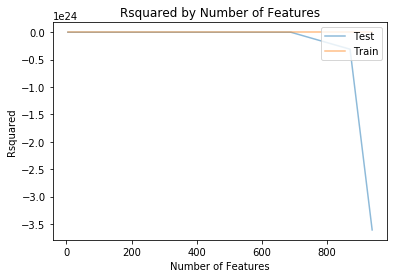

In [19]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

#### Question 5

**5.** The default penalty on coefficients using linear regression in sklearn is a ridge (also known as an L2) penalty.  Because of this penalty, and that all the variables were normalized, we can look at the size of the coefficients in the model as an indication of the impact of each variable on the salary.  The larger the coefficient, the larger the expected impact on salary.  

Use the space below to take a look at the coefficients.  Then use the results to provide the **True** or **False** statements based on the data.

#### Run the below to complete the following dictionary

In [6]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
4,smoker_yes,23628.367222,23628.367222
6,region_southeast,-970.968839,970.968839
7,region_southwest,-926.322908,926.322908
5,region_northwest,-486.934610,486.934610
2,children,424.119128,424.119128
1,bmi,348.906915,348.906915
0,age,261.296924,261.296924
3,sex_male,104.811823,104.811823


#### Congrats of some kind

Congrats!  Hopefully this was a great review, or an eye opening experience about how to put the steps together for an analysis.  List the steps.  In the next lesson, you will look at how take this and show it off to others so they can act on it.